In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from math import sqrt
from scipy.stats import norm
from matplotlib import rcParams

In [2]:
df = pd.read_csv("filipino_family_expenditure.csv")

In [3]:
df.head(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
list(df.columns)

['Total Household Income',
 'Region',
 'Total Food Expenditure',
 'Main Source of Income',
 'Agricultural Household indicator',
 'Bread and Cereals Expenditure',
 'Total Rice Expenditure',
 'Meat Expenditure',
 'Total Fish and  marine products Expenditure',
 'Fruit Expenditure',
 'Vegetables Expenditure',
 'Restaurant and hotels Expenditure',
 'Alcoholic Beverages Expenditure',
 'Tobacco Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Imputed House Rental Value',
 'Medical Care Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Education Expenditure',
 'Miscellaneous Goods and Services Expenditure',
 'Special Occasions Expenditure',
 'Crop Farming and Gardening expenses',
 'Total Income from Entrepreneurial Acitivites',
 'Household Head Sex',
 'Household Head Age',
 'Household Head Marital Status',
 'Household Head Highest Grade Completed',
 'Household Head Job or Business Indicator',
 'Household Head Occupat

# Checking for Skewness in Total Household Income

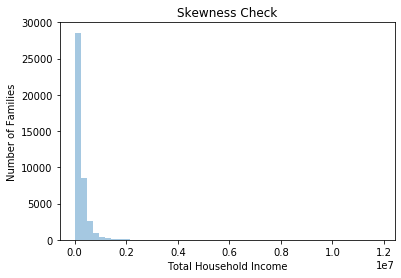

Skewness: 8.896631047132981


In [5]:
sns.distplot(list(df["Total Household Income"]), kde=False)
plt.title("Skewness Check")
plt.xlabel("Total Household Income")
plt.ylabel("Number of Families")
plt.show()

print("Skewness:", df["Total Household Income"].skew())

We observe an extrememly right-skewed graph. Hence the data must be normalized before it analysis can be done.

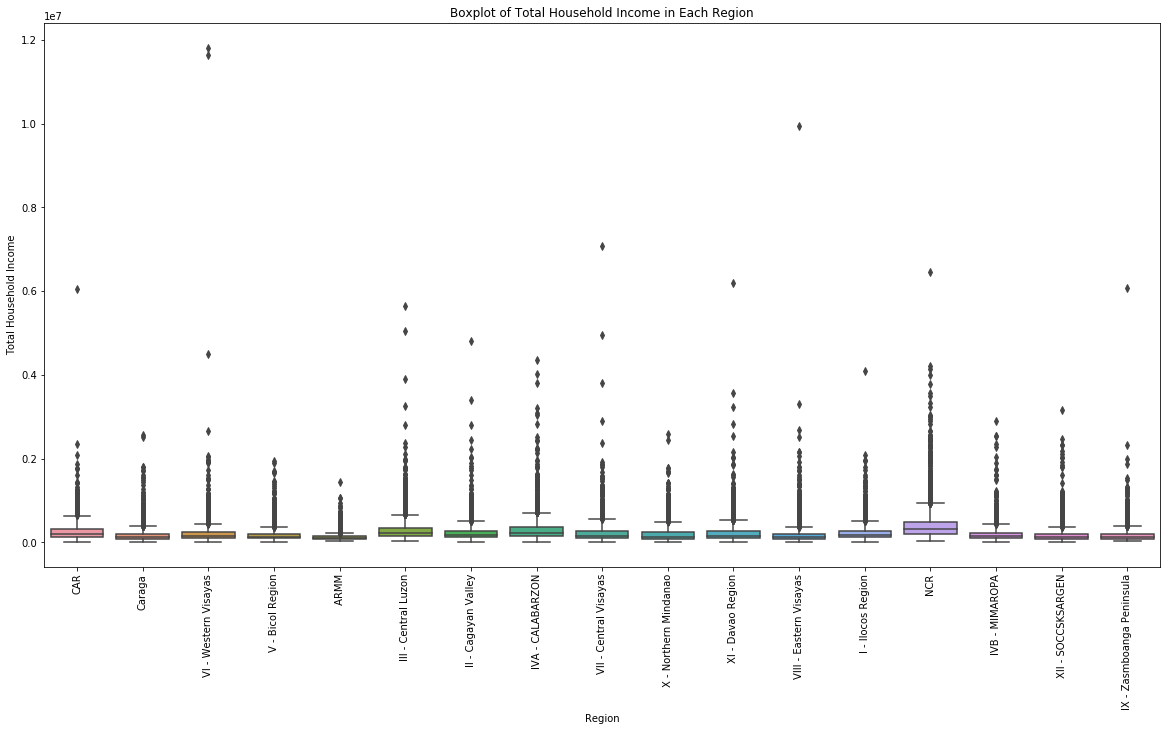

In [6]:
# Increasing the size of the plot.
rcParams['figure.figsize'] = [20, 10]

plt.xticks(rotation='vertical')
sns.boxplot(data=df, x="Region", y="Total Household Income")
plt.title("Boxplot of Total Household Income in Each Region")
plt.show()

The boxplots also contain many outliers which we will filter out, by creating two categories of income, middle income (all data points present within the whiskers of the box plot} and high income (outliers).

## Classifying Income Groups

In [7]:
a = df["Total Household Income"].describe()
IQR = a[6] - a[4]
middle_income = []
upper_income = []
middle_income_regions = []
upper_income_regions = []
lower_whisker = (a[4] - IQR*1.5)
upper_whisker = (a[6] + IQR*1.5)

for index, row in df.iterrows():
    income = row["Total Household Income"]
    region = row["Region"]
    if  lower_whisker <= income <= upper_whisker:
        middle_income.append(income)
        middle_income_regions.append(region)
    elif income >= upper_whisker:
        upper_income.append(income)
        upper_income_regions.append(region)

In [8]:
len(df["Total Household Income"]) == len(middle_income) + len(upper_income)

True

Therefore, our categories represent all data points. Thus there are no outliers in the lower end of the income spectrum.

# Boxplot of Middle Income Families

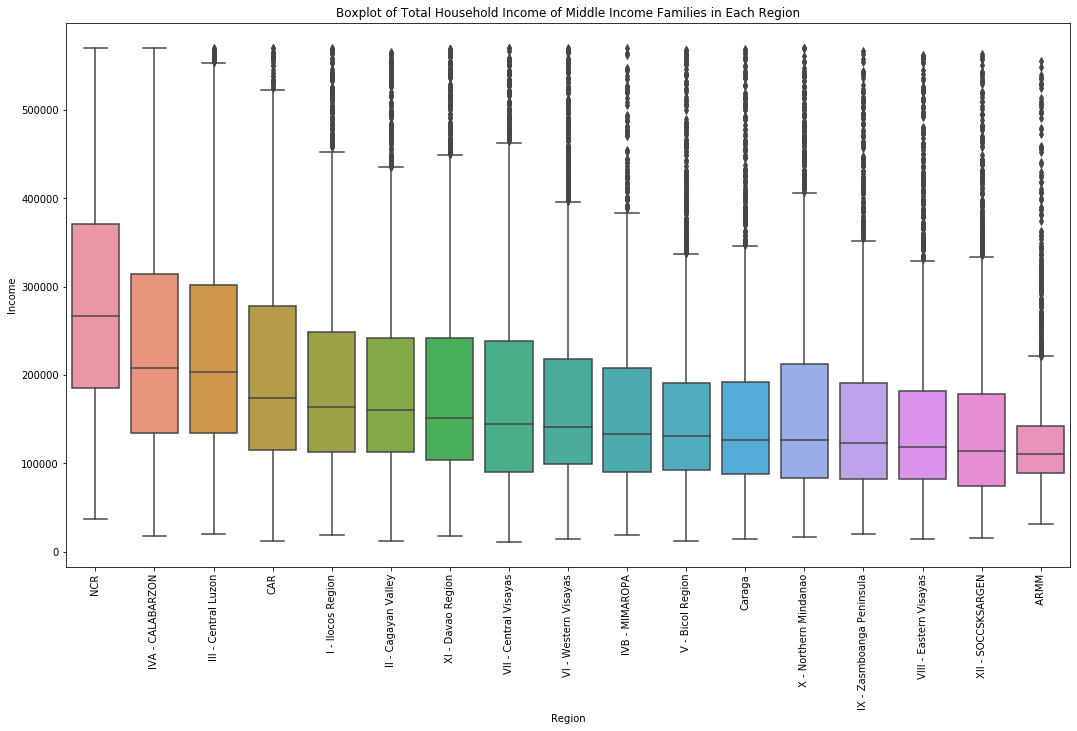

In [9]:
rcParams['figure.figsize'] = [18, 10]

datalist = [list() for i in range(len(middle_income))]

for i in range(len(middle_income)):
    datalist[i].append(middle_income_regions[i])
    datalist[i].append(middle_income[i])

plt.xticks(rotation='vertical')
data = pd.DataFrame(datalist, columns=["Region", "Income"])
my_order = data.groupby(by=["Region"])["Income"].median().sort_values(ascending=False).index
sns.boxplot(data=data.sort_values("Income"), x="Region", y="Income", order=my_order)
plt.title("Boxplot of Total Household Income of Middle Income Families in Each Region")
plt.show()

#### Thus our middle income category represents the weathier developed regions such as NCR and IVA-CALABARZON well, but doesn't represent poorer agricultural regions such as ARMM well.

# Boxplot of High Income Families

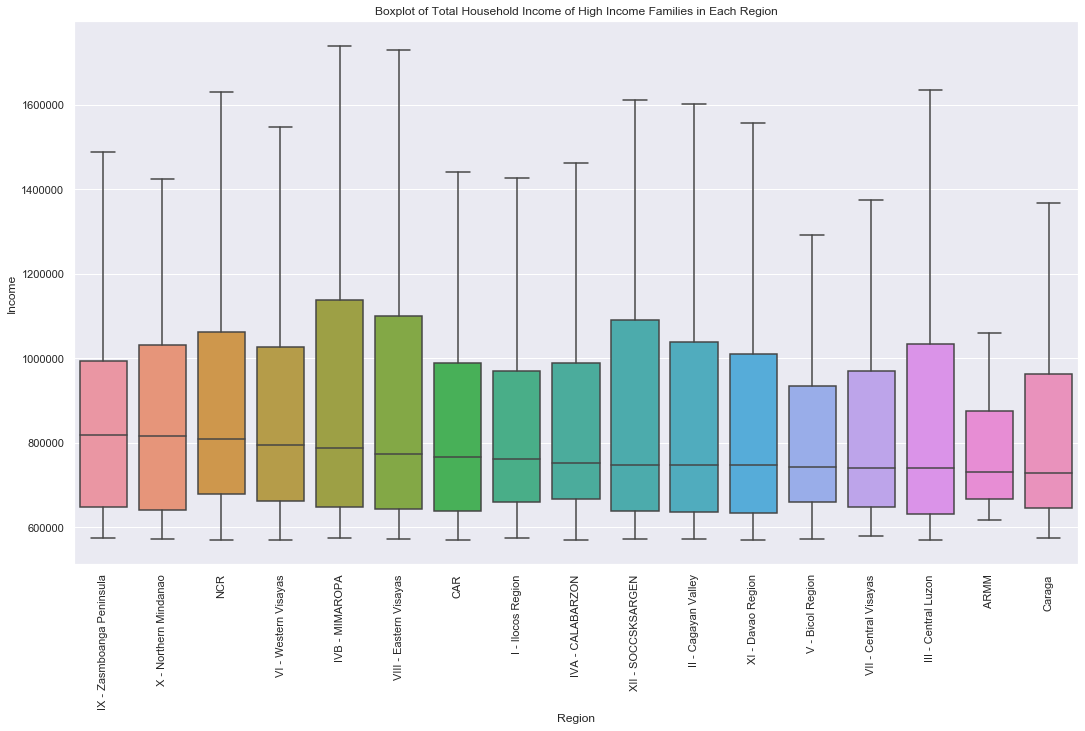

In [33]:
rcParams['figure.figsize'] = [18, 10]

datalist = [list() for i in range(len(upper_income))]

for i in range(len(upper_income)):
    datalist[i].append(upper_income_regions[i])
    datalist[i].append(upper_income[i])

plt.xticks(rotation='vertical')
data = pd.DataFrame(datalist, columns=["Region", "Income"])
my_order = data.groupby(by=["Region"])["Income"].median().sort_values(ascending=False).index
sns.boxplot(data=data.sort_values("Income"), x="Region", y="Income", order=my_order, showfliers=False)
plt.title("Boxplot of Total Household Income of High Income Families in Each Region")
plt.show()

#### Outliers have been ignored here, but the high income category represents all regions almost equally well.

# Plotting Househeld Head Sex Unemployment Ratio

In [11]:
male_head_count=0
female_head_count=0
male_head_unemployed_count = 0
female_head_unemployed_count = 0

for i in range(len(df)):
    if df["Household Head Sex"][i]=="Male":
        male_head_count+=1
        if df["Household Head Job or Business Indicator"][i]=='No Job/Business':
            male_head_unemployed_count += 1
    if df["Household Head Sex"][i]=="Female":
        female_head_count+=1
        if df["Household Head Job or Business Indicator"][i]=='No Job/Business':
            female_head_unemployed_count += 1

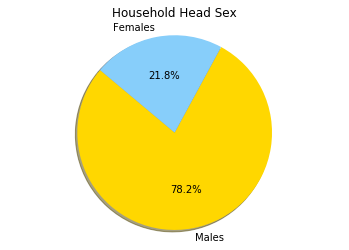

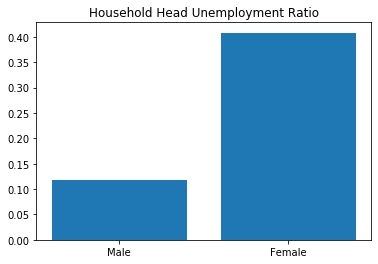

In [12]:
labels = "Males","Females"
sizes = [male_head_count,female_head_count]
colors = ['gold','lightskyblue']
explode=(0,0)

rcParams['figure.figsize'] = [6, 4]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Household Head Sex")
plt.axis('equal')
plt.show()

plt.bar(["Male","Female"], height=[male_head_unemployed_count/male_head_count, female_head_unemployed_count/female_head_count])
plt.title("Household Head Unemployment Ratio")
plt.show()

#### Thus even though the proportion of males as family heads were greater than females, the unemplyment ratio among females was far higher than that of males.


## Plotting Average Income by Household Head Highest Grade Completed

In [13]:
grades = df["Household Head Highest Grade Completed"]
incomes = df["Total Household Income"]
job_incomes = {key: list() for key in set(df["Household Head Highest Grade Completed"])}
    
for i in range(len(df)):
    job_incomes[grades[i]].append(incomes[i])
    
# Cleaning out long label names
long_labels = ['Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree', 
              'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)']

replacement_labels = ['Other Mid-level Education Programs', 'Other High-level Education Programs']
for i, label in enumerate(long_labels):
    if label in job_incomes:
        job_incomes[replacement_labels[i]] = job_incomes[label]
        job_incomes.pop(label)

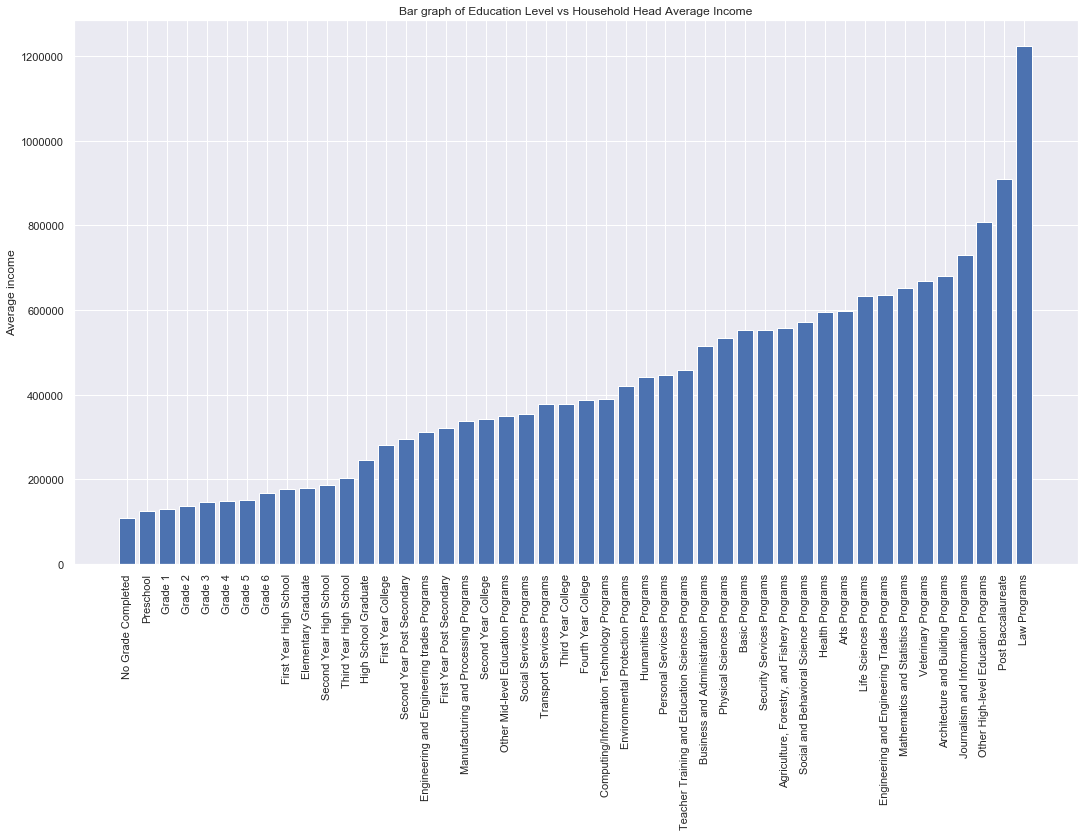

In [34]:
rcParams['figure.figsize'] = [18, 10]

avg_incomes = [np.mean(i) for i in job_incomes.values()]
plt.xticks(rotation='vertical')
plt.bar(x=sorted(job_incomes.keys(), key=lambda x: np.mean(job_incomes[x])),
        height=sorted(avg_incomes))
plt.ylabel("Average income")
plt.title("Bar graph of Education Level vs Household Head Average Income")
plt.show()

#### Therefore , we observe that people who have studied law programs have the highest average salary of about 12,00,000 followed by post-Baccalaureate. 
#### People with no grade completed have the lowest average income followed by preschool and grade 1 and hence we can say that better the education , higher the income.

# Variation of Income with Region

In [15]:
region=df["Region"]
incomes=df["Total Household Income"]
region_incomes = dict.fromkeys(set(df["Region"]))

for i in region_incomes:
    region_incomes[i] = []

for i in range(len(df)):
    region_incomes[region[i]].append(incomes[i])

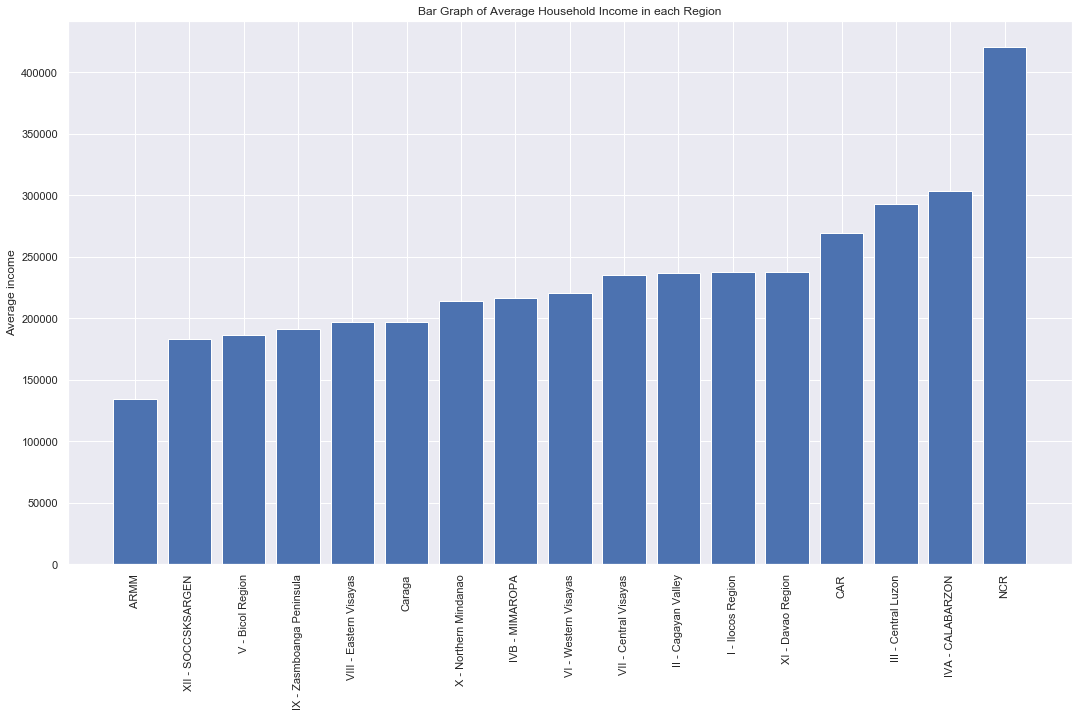

In [35]:
rcParams['figure.figsize'] = [18, 10]

avg_incomes = [np.mean(i) for i in region_incomes.values()]
plt.xticks(rotation='vertical')
plt.bar(x=sorted(region_incomes.keys(), key=lambda x: np.mean(region_incomes[x])), height=sorted(avg_incomes))
plt.ylabel("Average income")
plt.title("Bar Graph of Average Household Income in each Region")
plt.show()

We observe people staying in NCR region have the highest value of average income of about 4,00,000. NCR region is the capital region and the population density is likely higher compared to other cities. This graph shows that NCR is the richest region of all ,followed by IVA-CALABARZON and III-Central Luzon regions.

# Variation of Electricity Access by Region

In [17]:
electricity = df["Electricity"]

elec_region = {key: list() for key in set(df["Region"])}
for i in range(len(df)):
    elec_region[df["Region"][i]].append(electricity[i])

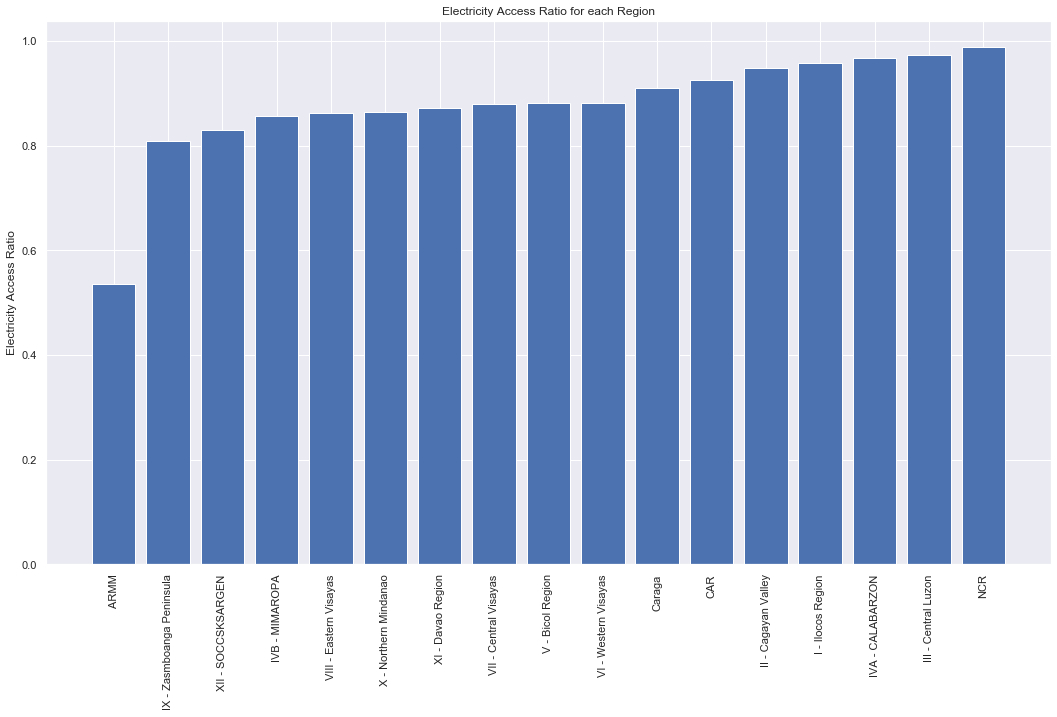

In [36]:
rcParams['figure.figsize'] = [18, 10]

avg_elec = [np.mean(i) for i in elec_region.values()]
plt.xticks(rotation='vertical')
plt.bar(x=sorted(elec_region.keys(), key=lambda x: np.mean(elec_region[x])), height=sorted(avg_elec))
plt.ylabel("Electricity Access Ratio")
plt.title("Electricity Access Ratio for each Region")
plt.show()

#### This shows that approximately 98-99% of the houses in the well developed metropolitan NCR region have access to electricity where as only 53% of the houses have access to electricity in the agricultural ARMM region. 

# Income Sources of High and Middle Income Families

In [19]:
income_sources = {key: 0 for key in set(df["Main Source of Income"])}

for i in range(len(df["Main Source of Income"])):
    if df["Total Household Income"][i] > upper_income[0]:
        income_sources[df["Main Source of Income"][i]] += 1

for key,value in income_sources.items():
    print(f"Number of high income families whose income source is {key} = {value}")

Number of high income families whose income source is Enterpreneurial Activities = 456
Number of high income families whose income source is Other sources of Income = 693
Number of high income families whose income source is Wage/Salaries = 1445


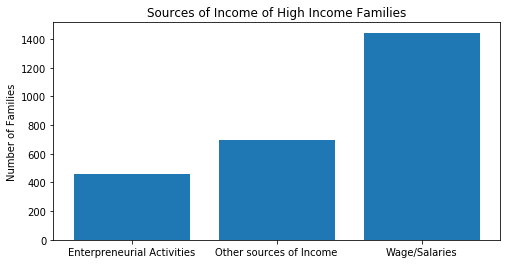

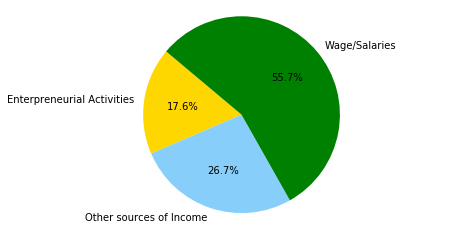

In [20]:
rcParams['figure.figsize'] = [8, 4]

plt.bar(income_sources.keys(), height=income_sources.values())
plt.title("Sources of Income of High Income Families")
plt.ylabel("Number of Families")
plt.show()

colors = ['gold','lightskyblue','green']
explode=(0,0,0)

plt.pie(income_sources.values(),
        explode=explode,
        labels=income_sources.keys(),
        colors=colors,
        autopct='%1.1f%%',
        shadow=False,
        startangle=140)
plt.axis('equal')
plt.show()

Therefore most of the high income families have their main source of income as Wage/ Salaries. There is a low proportion of enterpreneurs. People tend to go for safer options maybe because the government and the economy is not supportive for enterpreneurship.

In [21]:
income_sources = {key: 0 for key in set(df["Main Source of Income"])}

for i in range(len(df["Main Source of Income"])):
    if df["Total Household Income"][i] <= middle_income[-1]:
        income_sources[df["Main Source of Income"][i]] += 1

for key,value in income_sources.items():
    print(f" Number of middle income families whose income source is {key} = {value}")

 Number of middle income families whose income source is Enterpreneurial Activities = 4718
 Number of middle income families whose income source is Other sources of Income = 4476
 Number of middle income families whose income source is Wage/Salaries = 5869


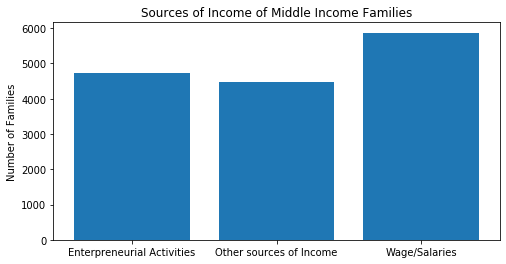

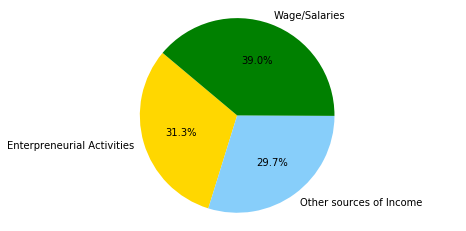

In [22]:
rcParams['figure.figsize'] = [8, 4]

plt.bar(income_sources.keys(), height=income_sources.values())
plt.title("Sources of Income of Middle Income Families")
plt.ylabel("Number of Families")
plt.show()

colors = ['gold','lightskyblue','green']
explode=(0,0,0)

plt.pie(income_sources.values(),
        explode=explode,
        labels=income_sources.keys(),
        colors=colors,
        autopct='%1.1f%%',
        shadow=False,
        startangle=140)
plt.axis('equal')
plt.show()

#### When we compare the trends between the middle and high income families we observe that the main source of income for both is wages.

#### But 31.3% of the middle income families become enterpreneurs compared to that of only 17.6% of high income families.

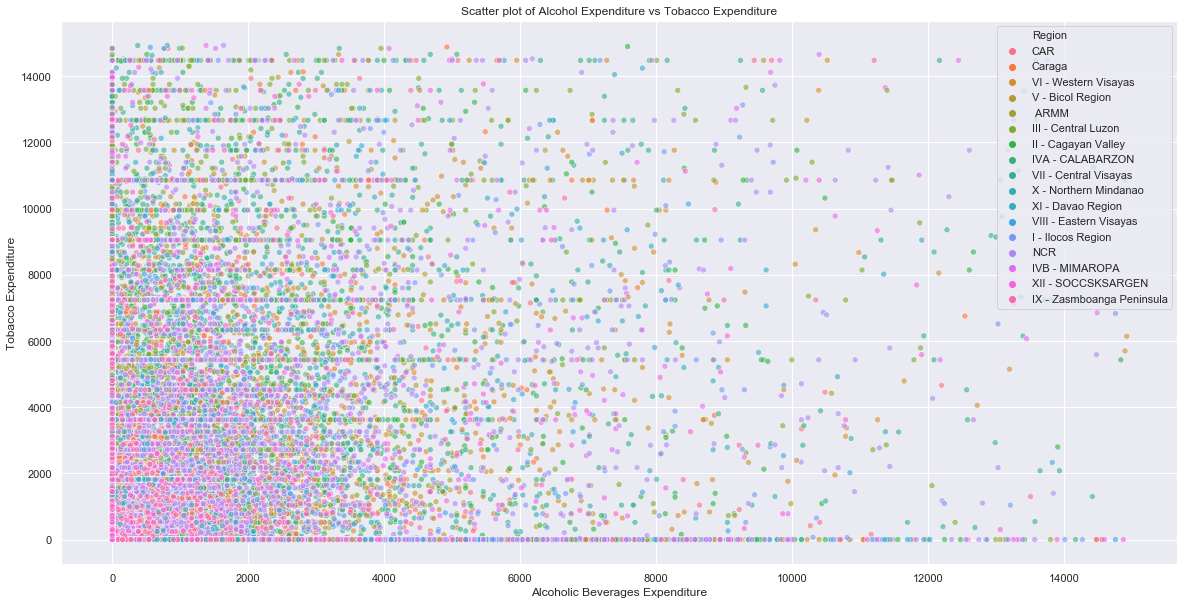

Correlation = 0.25690251014422383


In [38]:
rcParams['figure.figsize'] = [20, 10]
sns.scatterplot(x=df["Alcoholic Beverages Expenditure"][df["Alcoholic Beverages Expenditure"] < 15000], 
                y=df["Tobacco Expenditure"][df["Tobacco Expenditure"] < 15000],
                hue=df["Region"],
                alpha=0.6)
plt.title("Scatter plot of Alcohol Expenditure vs Tobacco Expenditure")
plt.show()
print(f'Correlation = {df.corr()["Alcoholic Beverages Expenditure"]["Tobacco Expenditure"]}')

#### Thus we can see that Alcoholic Beverages Expenditure and Tobacco Expenditure do not have a very strong correlation.

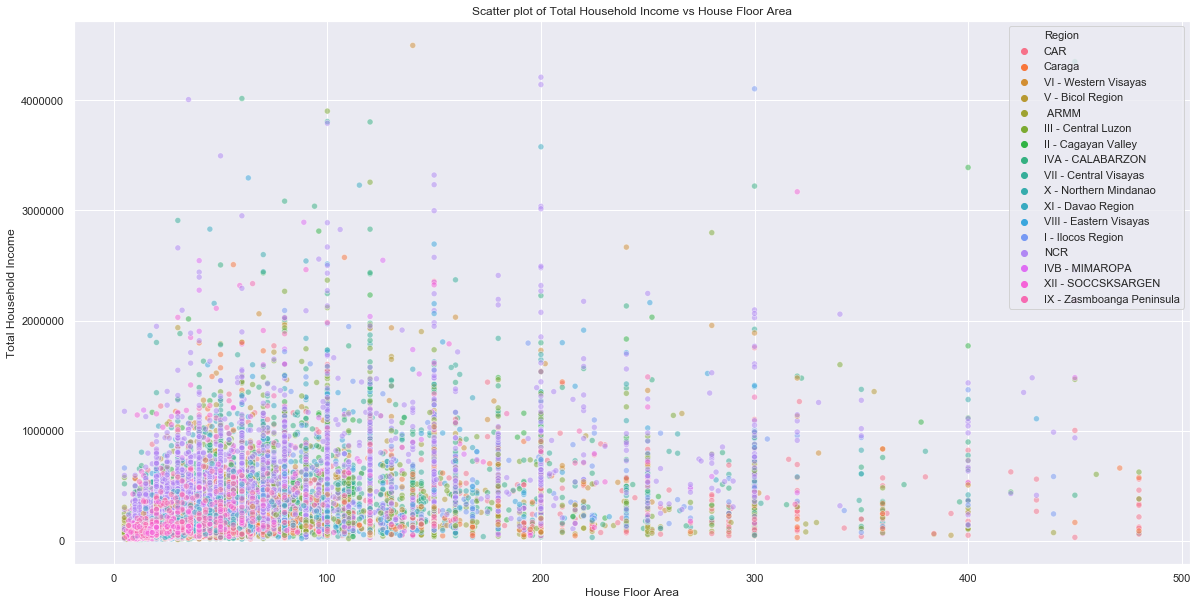

Correlation = 0.3432089548446198


In [39]:
rcParams['figure.figsize'] = [20, 10]

sns.scatterplot(x=df["House Floor Area"][df["House Floor Area"] < 500 ],
                y=df["Total Household Income"][df["Total Household Income"] < (0.45*(10**7)) ],
                hue=df["Region"],
                alpha=0.5)
plt.title("Scatter plot of Total Household Income vs House Floor Area")
plt.show()
print(f'Correlation = {df.corr()["Total Household Income"]["House Floor Area"]}')

#### We observe the trend: As the total household income increases, the house floor area does not tend to increase. This may indicate that people may prefer to move to more developed areas such as the NCR and IVA-CALABARZON, which have a higher household income and likely have a higher housing cost. 

#### Thus people prefer to buy smaller homes in well developed regions rather than large homes in less developed regions, such as the ARMM and XII-SOCCSKARGEN, which have a low household income and thus a lower housing cost, due to them being agricultural regions.

# Plotting a Correlation Matrix

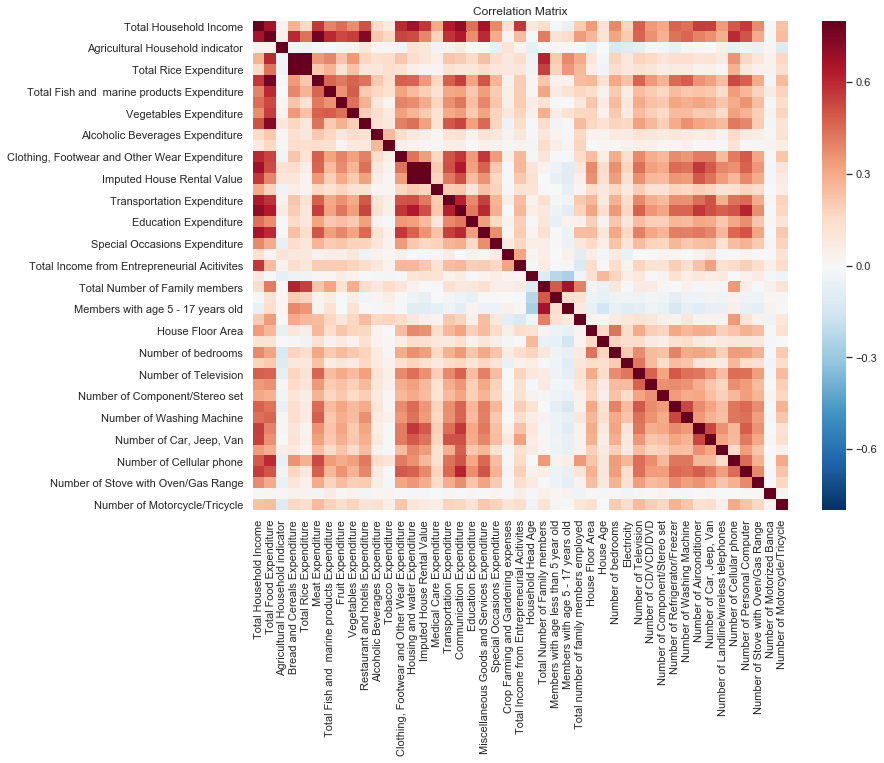

In [40]:
rcParams['figure.figsize'] = [20, 10]

corrmat = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, vmin=-0.8, cmap="RdBu_r")
plt.title("Correlation Matrix")
plt.show()

#### We observe that Total Household Income and Total Food Expenditure are the variables that correlates most well with all the other variable. 

#### We also observe that the most correlated variables are 'Total Rice Expenditure', and 'Bread and Cereal Expenditure'. These are likely influenced by the size of the family, causing more expenditure on both as the family size increases.

#### Other strong correlations we can see are Imputed House Rental Value corelating well with Housing and Water Expenditure. Thus we can infer that homes that are more well maintained and furnished with adequate water supply are more likely to attract rentals who are willing to pay more.

# Top 10 Variables Most Correlated with Total Household Income

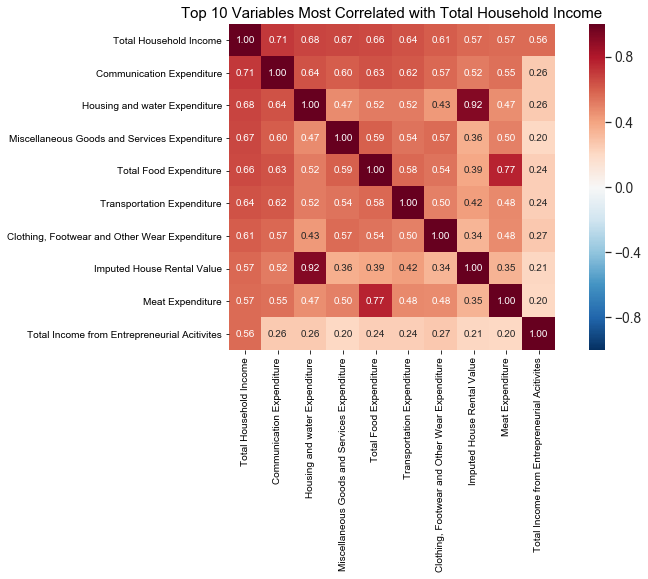

In [26]:
k = 10
corrmat = df.corr()
cols = corrmat.nlargest(k, "Total Household Income")["Total Household Income"].index
plt.subplots(figsize=(12, 6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
s = sns.heatmap(cm, cbar=True, annot=True, square=True,
                fmt='.2f', annot_kws={'size': 10},
                vmax=1.0, vmin=-1.0,
                yticklabels=cols.values, 
                xticklabels=cols.values,
                cmap="RdBu_r")
s.set_title("Top 10 Variables Most Correlated with Total Household Income", size=15)
plt.show()

#### Thus we observe that communication, housing and water expenditure are most strongly correlated to Total Household Income. Thus more wealthier families are more connected by means of Internet access, Mobile Phones, Televisions etc. and they also have more well furnished and maintained homes, with adequate water supply.

#### However, Total Income from Entrepreneurial Activities is not as strongly correlated. This lines up well with our earlier inference on middle income families relying more on entrepreneurial activities than high income families.

# Top 10 Variables Most Correlated with Total Food Expenditure

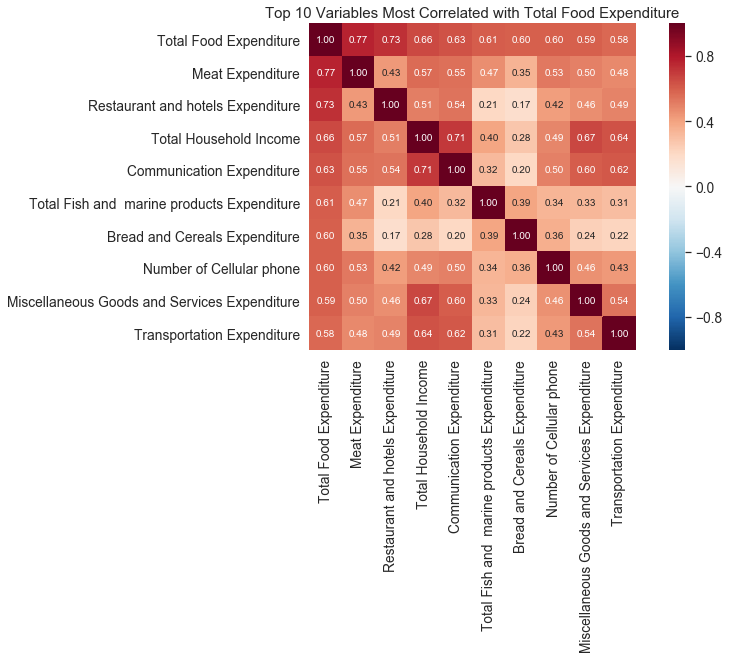

In [27]:
k = 10
corrmat = df.corr()
cols = corrmat.nlargest(k, "Total Food Expenditure")["Total Food Expenditure"].index
plt.subplots(figsize=(12, 6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
s = sns.heatmap(cm, cbar=True, annot=True, square=True,
                fmt='.2f', annot_kws={'size': 10},
                vmax=1.0, vmin=-1.0,
                yticklabels=cols.values, 
                xticklabels=cols.values,
                cmap="RdBu_r")
s.set_title("Top 10 Variables Most Correlated with Total Food Expenditure", size=15)
plt.show()

#### Thus we observe that meat and restaurant expenditure are highly correlated with overall food expenditure, as they are usually the most expensive parts. As Total Food Expenditure also correlates well with Total Household Income, we can infer that high income families tend to spend more money on meat and restaurant food.

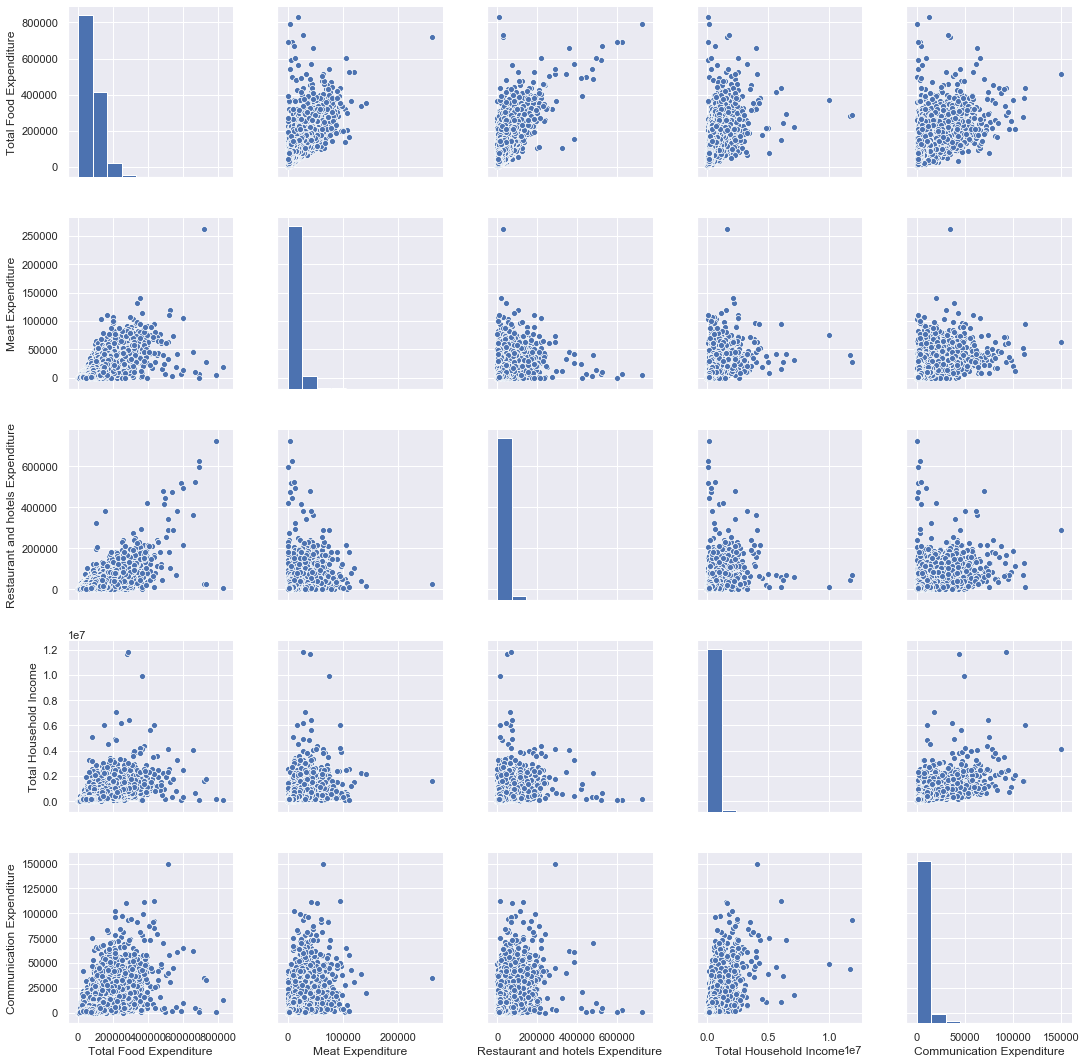

In [42]:
rcParams['figure.figsize'] = [16, 10]

sns.set()
sns.pairplot(df[cols[:5]], height=3)
plt.show()

# Predicting House Rental Value in NCR Region from Housing and Water Expenditure using the Least Squares method

In [29]:
independent = df["Housing and water Expenditure"]
dependent = df["Imputed House Rental Value"]

expenditures = []
rent_values = []

for i, exp in enumerate(independent):
    if df["Region"][i] == "NCR":
        expenditures.append(exp)

for i, exp in enumerate(dependent):
    if df["Region"][i] == "NCR":
        rent_values.append(exp)

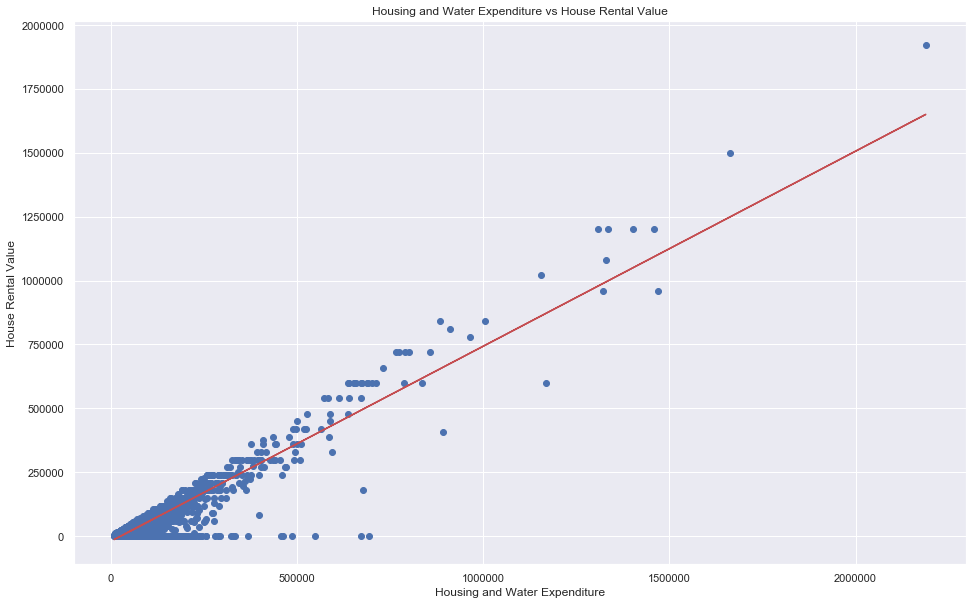

In [43]:
X_mean = np.mean(expenditures)
Y_mean = np.mean(rent_values)

num = 0
den = 0
for i in range(len(expenditures)):
    num += (expenditures[i] - X_mean)*(rent_values[i] - Y_mean)
    den += (expenditures[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

actual_exp_values = random.choices(expenditures, k=100)
actual_rent_values = random.choices(rent_values, k=100)

plt.scatter(expenditures, rent_values)

linear_values = [m*x + c for x in expenditures]
plt.plot(expenditures, linear_values, color = 'r')
plt.xlabel("Housing and Water Expenditure")
plt.ylabel("House Rental Value")
plt.title("Housing and Water Expenditure vs House Rental Value")
plt.show()

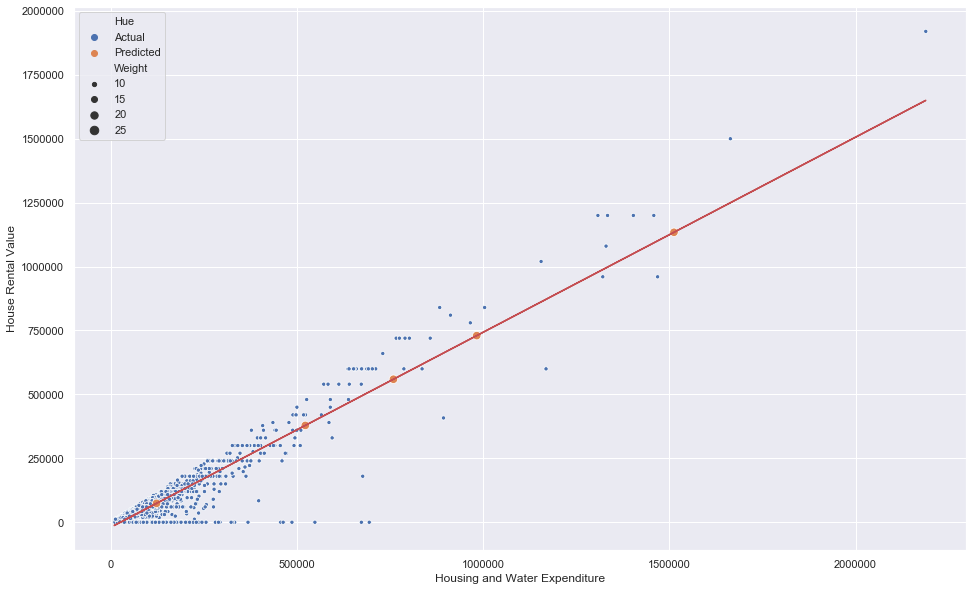

In [31]:
test_values = [522560, 759200, 123100, 1512420, 982820]
predicted_values = [value*m + c for value in test_values]

X_values = expenditures + test_values
Y_values = rent_values + predicted_values
hue = ["Actual" for _ in rent_values] + ["Predicted" for _ in predicted_values]
weights = [10 for _ in rent_values] + [25 for _ in predicted_values]
datalist = [[x,y,h,w] for x,y,h,w in zip(X_values, Y_values, hue, weights)]

data = pd.DataFrame(datalist, columns=["Housing and Water Expenditure","House Rental Value","Hue","Weight"])

sns.scatterplot(x=data["Housing and Water Expenditure"],
                y=data["House Rental Value"],
                hue=data["Hue"],
                size=data["Weight"])
plt.plot(expenditures, linear_values, color = 'r')
plt.title("Adding Predicted Values")
plt.show()

In [32]:
for value in test_values:
    print(f"Housing and Water Expenditure = {value}")
    print(f"Predicted House Rental Value = {value * m + c}")

Housing and Water Expenditure = 522560
Predicted House Rental Value = 378772.4086510465
Housing and Water Expenditure = 759200
Predicted House Rental Value = 559350.2966199279
Housing and Water Expenditure = 123100
Predicted House Rental Value = 73948.02085502991
Housing and Water Expenditure = 1512420
Predicted House Rental Value = 1134125.8069982277
Housing and Water Expenditure = 982820
Predicted House Rental Value = 729992.7379130366
